# Classification


<font color="blue"> Jugal Patel </font>

# I. Introduction

- For this assignment I am going to implement four classification methods :-
     - Pocket Algorithm
     - QDA - Quadratic Discriminant Analysis 
     - LDA - Linear Discriminant Analysis 
     - Logistic Regression
- I have use 1994 census data for this assignment which consist of 48842 instances and 14 attributes. Divided the same data for training and testing.
- I will be using different evaluation matrix like confusion, accuracy, ROC etc.


# II. Data



## A. Description
I have used data set from https://archive.ics.uci.edu/ml/datasets/Census+Income which is a 1994 census data. it consist of 48842 instances and 14 attributes which predict whether income exceeds $50K/yr based on census data.
List of Attributes:-
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: less than equal 50k or more than 50k



In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("adult.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
df.columns=["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Drop null rows

In [3]:
for col in df.columns:
    cnt = df[col].value_counts()
    val = cnt[' ?'] if ' ?' in cnt.keys() else 0
    if val > 0:
        df = df[df.loc[:,col] != ' ?']
    print("For colums empty rows", col , " : ", val)

For colums empty rows age  :  0
For colums empty rows workclass  :  1836
For colums empty rows fnlwgt  :  0
For colums empty rows education  :  0
For colums empty rows education-num  :  0
For colums empty rows marital-status  :  0
For colums empty rows occupation  :  7
For colums empty rows relationship  :  0
For colums empty rows race  :  0
For colums empty rows sex  :  0
For colums empty rows capital-gain  :  0
For colums empty rows capital-loss  :  0
For colums empty rows hours-per-week  :  0
For colums empty rows native-country  :  556
For colums empty rows income  :  0


In [4]:
df['income'].value_counts()

 <=50K    22653
 >50K      7508
Name: income, dtype: int64

In [5]:
df['income'] = df['income'].apply(lambda x: -1 if x==' <=50K' else 1)

In [6]:
df['income'].value_counts()

-1    22653
 1     7508
Name: income, dtype: int64

In [7]:
df = df.drop(['education'], axis=1)

In [8]:
to_encode = ['workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

### Encoding categorial variables

In [9]:
df_new = pd.get_dummies(df, prefix=to_encode, columns=to_encode)
df_new.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,83311,0,0,13,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,0,0,40,-1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,0,0,40,-1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,0,0,40,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,0,0,40,-1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### splitting data

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df_new.loc[:, df_new.columns!='income'], df_new.loc[:, 'income'])

In [11]:
xtrain.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
22688,26,212748,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26946,25,96268,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
16823,27,240809,0,0,56,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26282,50,178596,0,1408,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22806,53,172991,0,0,25,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
print("Train data shape, ", xtrain.shape)
print("Test data shape", xtest.shape)

Train data shape,  (22620, 103)
Test data shape (7541, 103)


## B. Plots for understanding or analysis

In [13]:
df_vis = pd.read_csv("adult.csv")
df_vis.columns=["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
df_vis.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [14]:
import matplotlib.pyplot as plt

In [15]:
df_vis['income'] = df_vis['income'].apply(lambda x: -1 if x==' <=50K' else 1)

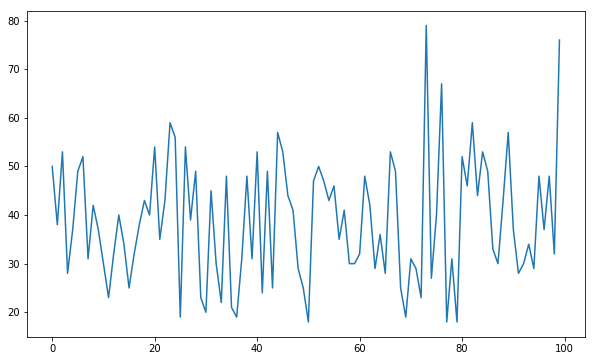

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(df_vis.shape[0])[:100], df_vis['age'].iloc[:100])

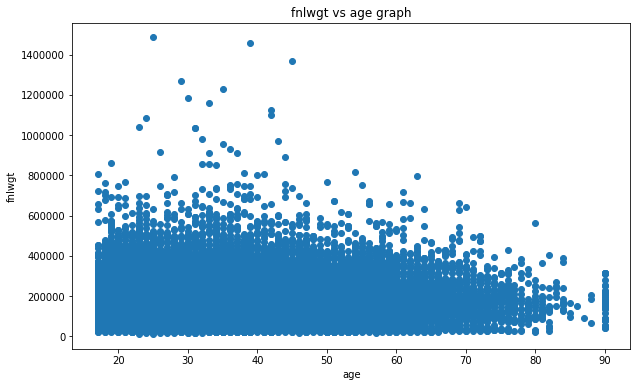

In [18]:
plt.figure(figsize=(10,6))
plt.title("fnlwgt vs age graph")
plt.xlabel("age")
plt.ylabel("fnlwgt")
l1 = list(zip(df_vis['age'],df_vis['fnlwgt']))
l1 = sorted(l1, key=lambda x:x[0])
plt.scatter([x[0] for x in l1], [x[1] for x in l1])

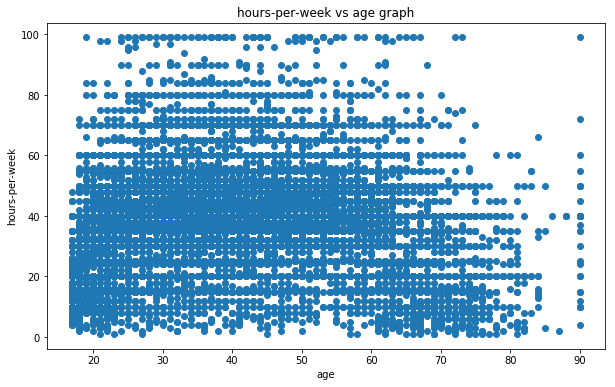

In [19]:
plt.figure(figsize=(10,6))
plt.title("hours-per-week vs age graph")
plt.xlabel("age")
plt.ylabel("hours-per-week")
l1 = list(zip(df_vis['age'],df_vis['hours-per-week']))
l1 = sorted(l1, key=lambda x:x[0])
plt.scatter([x[0] for x in l1], [x[1] for x in l1])

# III. Method


## A. Summary of Classification models
### Summary of Classification algorithms

### Pocket algorithm
* Pocket algorithm is based on perceptron leaning.
* Pocket algorithm is same as perceptron, only thing different in pocket algorithm is we keep track of weight which gave us best results on trainig.
* Pocket Algorithm is binary classifier algorithm.
* Following equation will cover both positive and negative class case in classification. Its also weight update step.
$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$

### QDA
* Gaussian assumption is:

$$
p(x \mid T = k) = \frac{1}{(2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}}} e^{ -\frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) }.
$$
* We can plug this gassian equation into bayes rule and we get : 
$$
P(T = k \mid x) = \frac{ \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k)} P(T = k)} { P(x) }.
$$
* Now in case of binary classification if class $k \in \{-1, +1\}$, then we can say data $x$ is from +1 class if following equation is true.
$$
P(T = +1 \mid x) > P(T = -1 \mid x).
$$
* In above equation we can use naive bayes and gausian assumption.
* In QDA there is no assumption that the covariance of each of the classes is identical. So for each class we have different covariance matrix.
* Final equation in qda is :
$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

* And for a new sample $\tilde{x}$, we can predict the label by taking argmax of delta function.

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$
### LDA
* LDA makes few assumption :
    - Multivariate normality: Independent variables are normal for each level of the grouping variable.
    - Homogeneity of variance/covariance (homoscedasticity): Variances among group variables are the same across levels of predictors. Can be tested with Box's M statistic.It has been suggested, however, that linear discriminant analysis be used when covariances are equal, and that quadratic discriminant analysis may be used when covariances are not equal.
    - Multicollinearity: Predictive power can decrease with an increased correlation between predictor variables.
    - Independence: Participants are assumed to be randomly sampled, and a participant’s score on one variable is assumed to be independent of scores on that variable for all other participants.
* LDA final eqauation is same almost same as QDA ,in LDA we have same covariance matrix for class.
* Final Eqation of LDA looks as follows : 
$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$
$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

### Logistic regression
* Logistic regression uses an equation as the representation, very much like linear regression.
* Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.
* In logistic regression we can use either sigmoid or softmax function to model output in range (0,1).


## B. Explanation of codes
* To implement these four classification algorithms i have created four classed with name pocketClassifier, qda, lda, and LogisticRegressoin.
* Classifier abstract base class is inherited in to all of those classifier which define some useful methods like add_ones, normalize and also two abstract method train and use.
* I have initialized all the weights with random number. For random number i have used constant seed. So that we get consistance random initialization.
* For pocket algorithm and logistic regression this are the keyword argument that you can pass.
    -  maxiter = maximum number of iteration to try
    -  init = which initializatin for weight matrix
    -  alpha = learning rate for pocketClassifier model
    -  verbose = bool value whether to print more information or not
* Logistic regression algorithm implememts one method used softmax.

## C. Pocket, LDA, QDA, Logistic Regression

### 1. Super Classs Definition

In [340]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        up = X - self.meanX
        Xs = np.divide(up, self.stdX, out=np.zeros_like(up), where=self.stdX!=0)
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### 2. Pocket Algorithm


In [341]:
class pocketClassifier(Classifier):
    
    def __init__(self,**kwargs):
        '''
            Init will take follwing kwargs:
            maxiter = maximum number of iteration to try
            init = which initializatin for weight matrix
            alpha = learning rate for pocketClassifier model
            verbose = bool value whether to print more information or not
        '''
        self.w = None
        self.maxiter = 10
        self.alpha = 0.1
        super(pocketClassifier,self).__init__()
        self.__dict__.update(kwargs)
        self.w_pocket = None

        
    # better function will return True if w is better than w_pocket othewise false
    def better(self ,X, T):
        yw = np.sign(X@self.w)
        yp = np.sign(X@self.w_pocket)
        return np.sum(yw == T) > np.sum(yp == T)
    
    def train(self,X,T):
        from copy import copy
        X = self.add_ones(X)
        self.w = np.random.rand(X.shape[1])
        self.w_pocket = np.random.rand(X.shape[1])
        print(X.shape, self.w_pocket.shape)
        for i in range(self.maxiter):
            
            converge = True
            for j in range(X.shape[0]):
            
                y = self.w @ X[j]
                if np.sign(y) != np.sign(T[j]):
                    self.w += self.alpha * T[j] * X[j]
                    converge = False
                    if self.better(X, T):
                        self.w_pocket = copy(self.w)
            if converge:
                print("Converged At iteration : ",i)
                break
             
    def use(self,X):
        print(X.shape, self.w_pocket.shape)
        X = self.add_ones(X)
        return X@self.w_pocket

### 3. QDA

In [342]:
class qda(Classifier):
    def __init__(self,**kwargs):
        super(qda,self).__init__(**kwargs)
        self.__dict__.update(**kwargs)
        
        
    '''
        X and T expected to be numpy array
    '''
    def train(self,X,T):
        from collections import Counter
        cntr = Counter(T)
        self.classes = list(cntr.keys())
        self.total = T.shape[0]
        self.prior = dict( (key, cntr[key]/self.total) for key in self.classes)
#         X = self.normalize(X)
        
        # following block will calculate cov matrix for each class and store it into a dictionary
        self.cov_ = dict((key,None) for key in self.classes)
        for key in self.classes:
            temparr = np.array([ar for i,ar in enumerate(X) if T[i] == key])
            cov_ = np.cov(temparr.T)
            self.cov_.update({key:cov_})
        
        # calculating mean of each feature
        self.mean = dict((key,None) for key in self.classes)
        for key in self.classes:
            temparr = np.array([ar for i,ar in enumerate(X) if T[i] == key])
            mu = np.mean(temparr,0)
            self.mean.update({key:mu})
    
    #following function will calculate log probability 
    def discriminant_function(self,X,key):
        import numpy as np
        return -0.5 * np.log(np.linalg.det(np.abs(self.cov_[key]))) \
                -0.5 * np.sum(np.dot((X - self.mean[key]), np.linalg.pinv(np.abs(self.cov_[key]))) * (X - self.mean[key]),axis=1) \
                + np.log(self.prior[key])
        
    def use(self,X):
        res = []
        for c in self.classes:
            res.append(self.discriminant_function(X, c))
        return list(map(lambda x:self.classes[x],np.argmax(list(zip(*res)),axis=1)))
            

### 4. LDA

In [343]:
class lda(Classifier):
    
    def __init__(self,**kwargs):
        super(lda,self).__init__(**kwargs)
        self.__dict__.update(**kwargs)
        
    def train(self,X,T):
        from collections import Counter
        import numpy as np
        cntr = Counter(T)
        self.classes = list(cntr.keys())
        self.total = T.shape[0]
        self.prior = dict( (key, cntr[key]/self.total) for key in self.classes)
#         X = self.normalize(X)
        self.cov_ = np.cov(X.T)
        self.invcov = np.linalg.pinv(self.cov_)
        
        # calculating mean of each feature
        self.mean = dict((key,None) for key in self.classes)
        for key in self.classes:
            temparr = np.array([ar for i,ar in enumerate(X) if T[i] == key])
            mu = np.mean(temparr,0)
            assert mu.shape[0] == X.shape[1],"Mean function call wrong"
            self.mean.update({key:mu})
     
    #following function will calculate log probability 
    def discriminant_function(self,X,key):
        return np.sum(np.dot(X,self.invcov)*self.mean[key],axis=1)\
                - np.sum(0.5*np.dot(self.mean[key],self.invcov)*self.mean[key])\
                + np.log(self.prior[key])
                
    
    def use(self,X):
        res = []
        for c in self.classes:
            res.append(self.discriminant_function(X,c))
        return list(map(lambda x:self.classes[x],np.argmax(list(zip(*res)),axis=1)))

### 5. Logistic Regression

In [344]:
class LogisticRegression(Classifier):
    
    def __init__(self,**kwargs):
        '''
            Init will take follwing kwargs:
            maxiter = maximum number of iteration to try
            init = which initializatin for weight matrix
            alpha = learning rate for LogisticRegression model
            verbose = bool value whether to print more information or not
        '''
        super(LogisticRegression,self).__init__()
        # default values of hyper-parameters
        self.w = None
        self.maxiter = 10
        self.init = 'rand'
        self.alpha = 0.1
        self.verbose = True
        self.__dict__.update(**kwargs)
    
    def initW(self, x, y):
        import numpy as np
        np.random.seed(self.seed)
        if self.init == 'zero':
            self.w = np.zeros((x,y))
        if self.init == 'ones':
            self.w = np.ones((x,y))
        if self.init == 'rand':
            self.w = np.random.rand(x,y)*2-1

    def softmax(self,X):
        import numpy as np
        ex = np.exp(X)
        if len(X.shape)==1:
            return ex/np.sum(ex)
        else:
            return ex/np.sum(ex,axis=1,keepdims=True)
    
    def fx(self,X):
        return self.softmax(X@self.w)
    
    def train(self,X,T):
        import numpy as np
        import pandas as pd
        X = self.normalize(X)
        X = self.add_ones(X)
        
        # transforming T in one hot encoded vector
        T = pd.get_dummies(T)
        self.classes = T.columns.values
        
        self.initW(X.shape[1],T.shape[1])
        for k in range(self.maxiter):
            
            if self.verbose:
                if (k+1)%int(self.maxiter/10)==0:
                    print("Iteration : ",k+1," .....")
            y = self.fx(X)
            self.w += self.alpha * X.T @ (T - y)  
            
    def use(self,X):
        X = self.add_ones(X)
        return [ self.classes[i] for i in np.argmax(self.fx(X),axis=1)]
    

# IV. Experiments



## A. Discussion about evaluation metrics

* For evaluating classification result we can use many method.
* We have used 3 accuracy metrics.
    1. Accuracy
    2. Confusion Matrix
    3. ROC curve    

* Accuracy : For our binary classification task we can use number of correct predicted divided by total input size.

$$
accuracy = \frac{total\ correct\ prediction*100}{total\ number\ of\ sample} \%
$$


* Roc Curve: 
    * A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
    * In order to do this, a model needs to not only correctly predict a positive as a positive, but also a negative as a negative.
    * The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, the probability of predicting a real negative will be a positive.
       
       
* Confusion Matix : 
    * A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.
    * There are 4 basic terms in confusion matrix:
        * true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
        * true negatives (TN): We predicted no, and they don't have the disease.
        * false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
        * false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

## B. Discussion about train and test accuracies

## trainig different classifiers

In [345]:
def accuracy(true,predicted):
    return np.sum(predicted == true)*100/true.shape[0]

def cf_matrix(true,predicted):
    cf = pd.crosstab([true], [predicted], 
                     rownames = ['True'], 
                     colnames = ['Predicted'], 
                     margins = True)
    return cf

### 1. pocket algorithm training

In [346]:
pk_clf = pocketClassifier(maxiter = 15, alpha = 0.01)
pk_clf.train(xtrain.values, ytrain.values)

(22620, 104) (104,)


In [347]:
pk_op_test = np.sign(pk_clf.use(xtest.values))
pk_op_train = np.sign(pk_clf.use(xtrain.values))

(7541, 103) (104,)
(22620, 103) (104,)


In [348]:
pk_acc = (accuracy(ytrain.values,pk_op_train),accuracy(ytest.values,pk_op_test))
print(pk_acc)

(78.62511052166225, 79.00808911284976)


In [349]:
cf_matrix(ytrain, pk_op_train)

Predicted,-1.0,1.0,All
True,,,
-1,16521,438,16959
1,4397,1264,5661
All,20918,1702,22620


### 2. QDA training

In [350]:
qda_clf = qda()
qda_clf.train(xtrain.values, ytrain.values)

In [351]:
qda_op_test = qda_clf.use(xtest.values)
qda_op_train = qda_clf.use(xtrain.values)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log


In [352]:
qda_acc = (accuracy(ytrain.values,qda_op_train),accuracy(ytest.values,qda_op_test))
print(qda_acc)

(25.02652519893899, 24.49277284179817)


In [353]:
cf_matrix(ytrain, qda_op_train)

Predicted,1,All
True,,
-1,16959,16959
1,5661,5661
All,22620,22620


### 3. LDA trainining

In [354]:
lda_clf = lda()
lda_clf.train(xtrain.values, ytrain.values)

In [355]:
lda_op_test = lda_clf.use(xtest.values)
lda_op_train = lda_clf.use(xtrain.values)

In [356]:
lda_acc = (accuracy(ytrain.values,lda_op_train),accuracy(ytest.values,lda_op_test))
print(lda_acc)

(82.95313881520778, 83.26481898952393)


In [357]:
cf_matrix(ytrain, lda_op_train)

Predicted,-1,1,All
True,,,
-1,16326,633,16959
1,3223,2438,5661
All,19549,3071,22620


### 4. Logistic Regression

In [358]:
# This function will iterate over different values of alphas and return best model
def train_over_aplha():
    alpha = [0.03,0.01,0.003,0.001,0.0003,0.0001,0.00003,0.00001,0.000003,0.000001]
    results = {}
    best_acc = 0
    best_alpha = 0
    best_model = None

    for a in alpha:
        lr_clf = LogisticRegression(maxiter = 500, alpha = a, seed=42)
        
        lr_clf.train(xtrain.values,ytrain)
        lr_op = lr_clf.use(xtest.values)
        
        acc = accuracy(ytest,lr_op)
        results[a] = acc
        
        print("Alpha : ",a,"Accuracy",acc)
        
        if acc>best_acc:
            best_acc = acc
            best_alpha = a
            best_model = lr_clf
    
    print("Best Accuracy :", best_acc, "for alpha value of :",best_alpha)
    return best_model,results

lr_clf,results = train_over_aplha()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


Iteration :  50  .....
Iteration :  100  .....
Iteration :  150  .....
Iteration :  200  .....
Iteration :  250  .....
Iteration :  300  .....
Iteration :  350  .....
Iteration :  400  .....
Iteration :  450  .....
Iteration :  500  .....
Alpha :  0.03 Accuracy 75.50722715820183
Iteration :  50  .....
Iteration :  100  .....
Iteration :  150  .....
Iteration :  200  .....
Iteration :  250  .....
Iteration :  300  .....
Iteration :  350  .....
Iteration :  400  .....
Iteration :  450  .....
Iteration :  500  .....
Alpha :  0.01 Accuracy 75.50722715820183
Iteration :  50  .....
Iteration :  100  .....
Iteration :  150  .....
Iteration :  200  .....
Iteration :  250  .....
Iteration :  300  .....
Iteration :  350  .....
Iteration :  400  .....
Iteration :  450  .....
Iteration :  500  .....
Alpha :  0.003 Accuracy 24.49277284179817
Iteration :  50  .....
Iteration :  100  .....
Iteration :  150  .....
Iteration :  200  .....
Iteration :  250  .....
Iteration :  300  .....
Iteration :  350

### 1.  Pocket Algorithm train and test accuracy

In [359]:
pk_op_test = np.sign(pk_clf.use(xtest.values))
pk_op_train = np.sign(pk_clf.use(xtrain.values))
pk_acc = (accuracy(ytrain.values,pk_op_train),accuracy(ytest.values,pk_op_test))
print(" Train accuracy : ", pk_acc[0], "%", "\n Test accuracy : ", pk_acc[1] ,"%")

(7541, 103) (104,)
(22620, 103) (104,)
 Train accuracy :  78.62511052166225 % 
 Test accuracy :  79.00808911284976 %


In [360]:
cf_matrix(ytrain, pk_op_train)

Predicted,-1.0,1.0,All
True,,,
-1,16521,438,16959
1,4397,1264,5661
All,20918,1702,22620


### 2. QDA train and test accuracy

In [361]:
qda_op_test = qda_clf.use(xtest.values)
qda_op_train = qda_clf.use(xtrain.values)
qda_acc = (accuracy(ytrain.values,qda_op_train),accuracy(ytest.values,qda_op_test))
print(" Train accuracy : ", qda_acc[0], "%", "\n Test accuracy : ", qda_acc[1] ,"%")

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log


 Train accuracy :  25.02652519893899 % 
 Test accuracy :  24.49277284179817 %


In [362]:
cf_matrix(ytrain, qda_op_train)

Predicted,1,All
True,,
-1,16959,16959
1,5661,5661
All,22620,22620


### 3. LDA train and test accuracy

In [363]:
lda_op_test = lda_clf.use(xtest.values)
lda_op_train = lda_clf.use(xtrain.values)

In [364]:
lda_acc = (accuracy(ytrain.values,lda_op_train),accuracy(ytest.values,lda_op_test))
print(" Train accuracy : ", lda_acc[0], "%", "\n Test accuracy : ", lda_acc[1] ,"%")

 Train accuracy :  82.95313881520778 % 
 Test accuracy :  83.26481898952393 %


In [365]:
cf_matrix(ytrain, lda_op_train)

Predicted,-1,1,All
True,,,
-1,16326,633,16959
1,3223,2438,5661
All,19549,3071,22620


### 4. Logistic Regression train and test accuracy

In [366]:
print("Accuracy over different alphas: \n")
print(results)

Accuracy over different alphas: 

{0.03: 75.50722715820183, 0.01: 75.50722715820183, 0.003: 24.49277284179817, 0.001: 73.13353666622464, 0.0003: 76.63439862087256, 0.0001: 75.865269858109, 3e-05: 75.75918313221058, 1e-05: 75.74592229147328, 3e-06: 75.73266145073597, 1e-06: 75.70613976926137}


In [367]:
lr_op_test = lr_clf.use(xtest.values)
lr_op_train = lr_clf.use(xtrain.values)
lr_acc = (accuracy(ytrain.values,lr_op_train), accuracy(ytest.values,lr_op_test))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


In [368]:
print(" Train accuracy : ", lr_acc[0], "%", "\n Test accuracy : ", lr_acc[1] ,"%")

 Train accuracy :  76.19805481874447 % 
 Test accuracy :  76.63439862087256 %


## C. Plots for results 

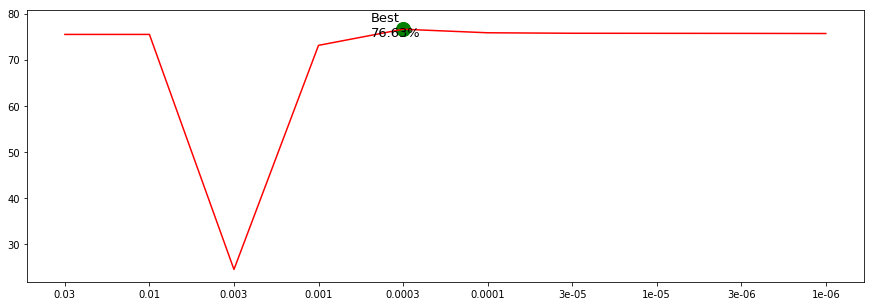

In [369]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.xticks(range(len(results)),results.keys())
plt.plot(results.values(),'r')
plt.scatter(np.argmax(list(results.values())), max(results.values()), c='g', s=200)
plt.text(np.argmax(list(results.values()))-0.38, max(results.values())-1.5, "Best\n"+str(round(max(results.values()),2))+'%',size = 13)
plt.show()

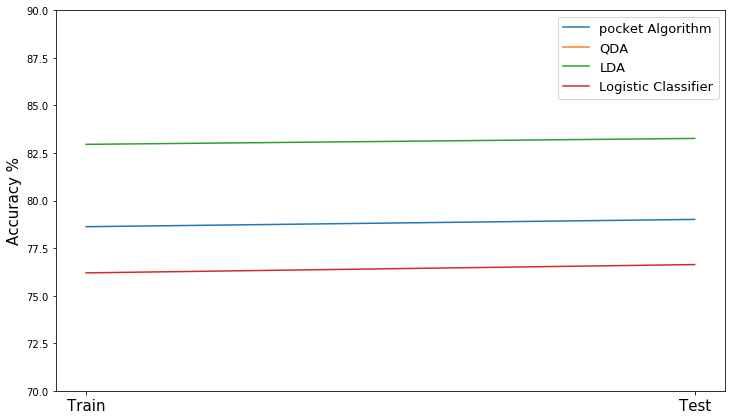

In [370]:
plt.figure(figsize=(12,7))
plt.clf()
plt.ylim([70,90])
plt.xticks([0,1],['Train','Test'],size=15)
plt.ylabel("Accuracy %",rotation = 90, size = 15)
plt.plot([0,1],pk_acc,label = 'pocket Algorithm')
plt.plot([0,1],qda_acc, label = 'QDA')
plt.plot([0,1],lda_acc, label = 'LDA')
plt.plot([0,1],lr_acc, label = 'Logistic Classifier')
plt.legend(prop={'size':13},loc='upper right')
plt.show()

(7541, 103) (104,)


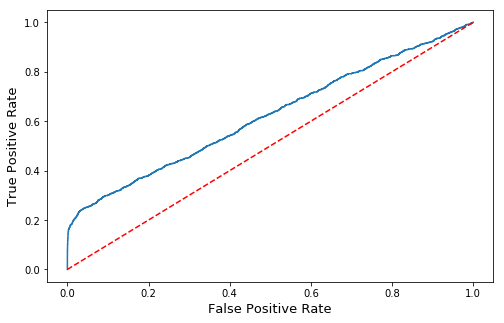

In [371]:
from sklearn.metrics import roc_curve
res = pk_clf.use(xtest)
thr = np.linspace(-0.5,1,9)
fpr, tpr, threshold = roc_curve(ytest,res)
plt.figure(figsize=(8,5))
plt.ylabel("True Positive Rate",rotation = 90, size = 13)
plt.xlabel("False Positive Rate", size = 13)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.show()

##  D. Discussions about classificaion model comparison

* After comparing models we can conclude that for our data LDA is perfoming best.
* On the other hand QDA model is not fitting on data at all.
* In terms of ruuning time pocket algorithm takes longest time to run becuase we update w after each data iteration.
* On the other hand for logistic regression training time for one model is not as much as pocket algortithm but we need to find optimal value of alpha.
* One thing i noticed during training of logistic regression that our model's weight matrix is going out of bound very fast.
* One reason for this weight matrix going nan is softmax function is exponential and what our input data range is also matters.
* All algorithms gives different result for normalized and unnormalized data.

# Conclusions

* After running all classifier on my selected data and after visualizing results using different accuracy matrix i came to following conclusions.
* Each classifier comes with its own weakness and strengths.
* From the accuracy we can conclude that LDA is performing best on our dataset.
* One important thing that i noticed is that if we use std normalized data in LDA its not fitting the data at all because of inverse matrix can not be created.
* Unlike first three model QDA, LDA, and Pocket Algorithms the Logistic regression model have one hyper parameter alpha which we need to tune. So it takes more training time to train.
* Also for higher valued of alpha w is getting out of hand fast. And start giving nan values because of overflow.
* For our case alpha 0.001 giving best results.

# References

https://archive.ics.uci.edu/ml/datasets/Census+Income    
https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/   
https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin   
https://towardsdatascience.com/classification-part-2-linear-discriminant-analysis-ea60c45b9ee5    
https://ftp.cs.nyu.edu/~roweis/csc2515-2006/readings/gallant.pdf    
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5